# Introduction à pandas

Le paquet Python `pandas` est une bibliothèque très populaire pour traiter des données.
Il est utilisé pour traiter des **données tabulaires**, c'est-à-dire qui se présentent sous la forme d'un tableau d'une à deux dimensions.
Typiquement, si vous avez des données tabulaires sauvegardées dans un fichier au format CSV (comma separated values) ou XLSX (un fichier Excel), `pandas` vous permet de facilement :
* lire les données et les sauvegarder dans un objet,
* effectuer des opérations sur cet objet pour traiter les données, et
* exporter les résultats obtenus dans un format courant (CSV, Excel, JSON, etc.).

> *Remarque* : Le terme `pandas` vient de l'expression *panel data*, c'est-à-dire des données de panel (aussi appelées données longitudinales) qui sont des données comprennenant plusieurs observations au cours du temps pour un même individu statistique.
À l'origine, cette bibliothèque a donc été developpée pour traiter des données de panel.
Néanmoins, de nombreuses fonctionnalités mises à disposition dans cette bibliothèque ne sont pas spécifiques aux données de panel et peuvent être utilisées pour traiter des données tabulaires de manière plus générale. 

L'objectif de ce tutoriel est de vous donner un bref aperçu des fonctionnalités possibles avec cette bibliothèque.

## 1. Installation et importation

Le nom du paquet sur le [Python Package Index](https://pypi.org) est [pandas](https://pypi.org/project/pandas/). Le paquet peut s'installer en utilisant pip avec la commande (dans le terminal) :

```bash
pip install pandas
```

Si vous avez une distribution Anaconda, `pandas` devrait déjà être installé, mais vous pouvez également l'installer avec la commande (dans le terminal) :

```bash
conda install pandas
```

Le nom du paquet installé est également `pandas`. C'est donc sous ce nom qu'on peut l'importer. Néanmoins, pour réduire la taille des lignes, une convention utilisée par tout le monde est de l'importer sous l'alias `pd` avec la commande suivante :

In [1]:
import pandas as pd

## 2. Les objets [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) et [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

### 2.1 L'objet [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

Commençons par des données à une seule dimension. Supposons que l'on a plusieurs observations ordonnées pour une seule variable. En mathématiques, on représenterait ces données sous la forme d'un vecteur. En Python, une représentation possible serait :

* une liste (type `list`) ou un t-uplet (type `tuple`) si l'indexation se fait uniquement sur la position, ou
* un dictionnaire (type `dict`) si l'indexation est quelconque.

`pandas` propose son propre type de données, appelé [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). Créons un tel objet avec des données simples (fictives) : les notes d'étudiant•e•s à un cours.

In [2]:
series = pd.Series(
    data=[16.5, 12.0, 19.25, 7.75, 13.0],
    index=[f'Etudiant {i}' for i in range(1, 6)],  # optionnel
    name='note'  # optionnel
)

Affichons cet objet :

In [3]:
series

Etudiant 1    16.50
Etudiant 2    12.00
Etudiant 3    19.25
Etudiant 4     7.75
Etudiant 5    13.00
Name: note, dtype: float64

On peut remarquer que notre objet a davantage d'informations que les données qu'on lui a fournies. En effet, un objet [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) a :

* un **index** : on a fourni l'index en construisant l'objet (des chaînes de caractères); par défaut, ce seraient les premiers entiers naturels
* des **valeurs** (ici celles données en argument du constructeur)
* un **nom** : on a fourni le nom en construisant l'objet (la chaîne de caractères `'note'`)
* un **type de données** (*dtype)* : par défaut, le type de données est inféré (ici float64 car l'argument est une liste de nombres flottants)

### 2.2 L'objet [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

Dans la pratique, on a en général plusieurs variables et non une seule. Il est donc nécessaire de représenter nos données en deux dimensions, typiquement dans un tableau. Sous R, vous utilisez probablement le type d'objets [data.frame](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/data.frame). `pandas` propose un type similaire appelé [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

Créons un tel objet avec des données simples (fictives) : les notes d'étudiant•e•s à plusieurs cours.

In [4]:
df = pd.DataFrame(
    data=[
        ['Etudiant 1', 'Semestre 1', 'Probabilités', 'Intégration', 9.0],
        ['Etudiant 1', 'Semestre 1', 'Probabilités', 'Probabilités', 11.5],
        ['Etudiant 1', 'Semestre 2', 'Programmation avec Python', 'IPOO', 14.25],
        ['Etudiant 1', 'Semestre 2', 'Programmation avec Python', 'PTD', 16.0],
        ['Etudiant 2', 'Semestre 1', 'Probabilités', 'Intégration', None],
        ['Etudiant 2', 'Semestre 1', 'Probabilités', 'Probabilités', 15.0],
        ['Etudiant 2', 'Semestre 2', 'Programmation avec Python', 'IPOO', 11.6],
        ['Etudiant 2', 'Semestre 2', 'Programmation avec Python', 'PTD', 13.5],
        ['Etudiant 3', 'Semestre 1', 'Probabilités', 'Intégration', 7.5],
        ['Etudiant 3', 'Semestre 1', 'Probabilités', 'Probabilités', 10.25],
        ['Etudiant 3', 'Semestre 2', 'Programmation avec Python', 'IPOO', None],
        ['Etudiant 3', 'Semestre 2', 'Programmation avec Python', 'PTD', 17.5],
    ],
    columns=['Etudiant', 'Semestre', 'UE', 'Cours', 'Note']
)

Affichons cet objet :

In [5]:
df

,Etudiant,Semestre,UE,Cours,Note
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25


Ici, nous n'avons pas fourni d'index lors de la construction de l'objet : les premiers entiers naturels sont donc utilisés.

Il est également possible de n'afficher que quelques lignes ou un échantillon.

In [6]:
df.head(5)

,Etudiant,Semestre,UE,Cours,Note
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN


In [7]:
df.sample(3)

,Etudiant,Semestre,UE,Cours,Note
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.5
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.5


In [8]:
df.tail()

,Etudiant,Semestre,UE,Cours,Note
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25
10,Etudiant 3,Semestre 2,Programmation avec Python,IPOO,NaN
11,Etudiant 3,Semestre 2,Programmation avec Python,PTD,17.50


Nous pouvons accéder aux différents attributs de cet objet :

In [9]:
df.shape  # T-uplet indiquant le nombre de lignes et de colonnes

(12, 5)

In [10]:
df.index

RangeIndex(start=0, stop=12, step=1)

In [11]:
df.columns

Index(['Etudiant', 'Semestre', 'UE', 'Cours', 'Note'], dtype='object')

In [12]:
df.dtypes

Etudiant     object
Semestre     object
UE           object
Cours        object
Note        float64
dtype: object

Chaque colonne d'un objet de type `pandas.DataFrame` correspond à un objet de type `pandas.Series` :

In [13]:
df['Note']

0      9.00
1     11.50
2     14.25
3     16.00
4       NaN
5     15.00
6     11.60
7     13.50
8      7.50
9     10.25
10      NaN
11    17.50
Name: Note, dtype: float64

## 3. Les opérations sur ces objets

### 3.1 Opérations simples

Les opérations simples, telles que les comparaisons ou les opérations mathématiques basiques, sont déjà implémentées :

In [14]:
series >= 10

Etudiant 1     True
Etudiant 2     True
Etudiant 3     True
Etudiant 4    False
Etudiant 5     True
Name: note, dtype: bool

In [15]:
series + 3

Etudiant 1    19.50
Etudiant 2    15.00
Etudiant 3    22.25
Etudiant 4    10.75
Etudiant 5    16.00
Name: note, dtype: float64

On peut calculer des statistiques simples, pour des variables numériques, avec des méthodes déjà implémentées :

In [16]:
series.max()

19.25

In [17]:
series.agg(('max', 'min', 'median', 'mean', 'std'))

max       19.250000
min        7.750000
median    13.000000
mean      13.700000
std        4.399574
Name: note, dtype: float64

La méthode [`pandas.series.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html) renvoie des statistiques descriptives simples :

In [18]:
series.describe()

count     5.000000
mean     13.700000
std       4.399574
min       7.750000
25%      12.000000
50%      13.000000
75%      16.500000
max      19.250000
Name: note, dtype: float64

Pour une variables catégorielle, on peut facilement déterminer ses valeurs uniques avec la méthode [`pandas.Series.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) et la fréquence des valeurs avec la méthode [`pandas.Series.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) :

In [19]:
df['Cours'].unique()

array(['Intégration', 'Probabilités', 'IPOO', 'PTD'], dtype=object)

In [20]:
df['Cours'].value_counts()

Cours
Intégration     3
Probabilités    3
IPOO            3
PTD             3
Name: count, dtype: int64

### 3.2 Indexation

Pour un objet [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html), on souhaite parfois obtenir une sous-série en ne gardant que certaines lignes.
Pour un objet [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), on souhaite parfois obtenir un sous-tableau en ne gardant que certaines lignes et/ou certaines colonnes.
`pandas` permet de facilement effectuer de telles opérations.

Il est possible d'indéxer un objet de type `pandas.Series` ou `pandas.DataFrame` comme on le ferait pour une liste, avec des entiers, : l'indexation se fait sur le premier axe, c'est-à-dire les lignes.

In [21]:
series[0:2]

Etudiant 1    16.5
Etudiant 2    12.0
Name: note, dtype: float64

In [22]:
df[0:10:2]

,Etudiant,Semestre,UE,Cours,Note
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50


Il est également possible d'utiliser les valeurs en index en utilisant les propriétés [`pandas.Series.loc`](https://pandas.pydata.org/docs/reference/api/pandas.Series.loc.html) et [`pandas.DataFrame.loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) :

In [23]:
series.loc['Etudiant 1']

16.5

In [24]:
series.loc[['Etudiant 1', 'Etudiant 5', 'Etudiant 2']]

Etudiant 1    16.5
Etudiant 5    13.0
Etudiant 2    12.0
Name: note, dtype: float64

In [25]:
df.loc[[0, 10, 3]]

,Etudiant,Semestre,UE,Cours,Note
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.0
10,Etudiant 3,Semestre 2,Programmation avec Python,IPOO,NaN
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.0


On peut également utiliser une série de booléens pour l'indexation :

In [26]:
series > 10.0

Etudiant 1     True
Etudiant 2     True
Etudiant 3     True
Etudiant 4    False
Etudiant 5     True
Name: note, dtype: bool

In [27]:
series[series > 10.0]

Etudiant 1    16.50
Etudiant 2    12.00
Etudiant 3    19.25
Etudiant 5    13.00
Name: note, dtype: float64

In [28]:
df[df['Note'] > 10.0]

,Etudiant,Semestre,UE,Cours,Note
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25
11,Etudiant 3,Semestre 2,Programmation avec Python,PTD,17.50


Pour un `pandas.DataFrame`, il est également possible de faire de l'indexation sur les colonnes (pour ne prendre qu'un sous-ensemble des colonnes) :

In [29]:
df[['Etudiant']]

,Etudiant
0,Etudiant 1
1,Etudiant 1
2,Etudiant 1
3,Etudiant 1
4,Etudiant 2
5,Etudiant 2
6,Etudiant 2
7,Etudiant 2
8,Etudiant 3
9,Etudiant 3


In [30]:
df[['Etudiant', 'Cours', 'Note']]

,Etudiant,Cours,Note
0,Etudiant 1,Intégration,9.00
1,Etudiant 1,Probabilités,11.50
2,Etudiant 1,IPOO,14.25
3,Etudiant 1,PTD,16.00
4,Etudiant 2,Intégration,NaN
5,Etudiant 2,Probabilités,15.00
6,Etudiant 2,IPOO,11.60
7,Etudiant 2,PTD,13.50
8,Etudiant 3,Intégration,7.50
9,Etudiant 3,Probabilités,10.25


Il est possible de renommer ou d'enlever des colonnes grâce aux méthodes [`pandas.DataFrame.rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) et [`pandas.DataFrame.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) respectivement.

**Remarque** : Ces opérations n'affectent pas l'objet d'origine (sauf si vous renseignez le paramètre `inplace=True`).

In [31]:
# Renommer des colonnes en utilisant un dictionnaire, puis afficher
df.rename(columns={'Etudiant': 'Student', 'UE': 'Unité'}).head()

,Student,Semestre,Unité,Cours,Note
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN


In [32]:
df.drop(columns=['Semestre', 'UE']).head()

,Etudiant,Cours,Note
0,Etudiant 1,Intégration,9.00
1,Etudiant 1,Probabilités,11.50
2,Etudiant 1,IPOO,14.25
3,Etudiant 1,PTD,16.00
4,Etudiant 2,Intégration,NaN


Au contraire des deux méthodes ci-dessus, ajouter une nouvelle colonne modifie l'instance de `pandas.DataFrame` :

In [33]:
df['Valide'] = df['Note'] >= 10
df.head()

,Etudiant,Semestre,UE,Cours,Note,Valide
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00,False
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50,True
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25,True
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00,True
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN,False


Enfin, pour `pandas.DataFrame`, on peut effectuer en même temps de l'indexation sur les lignes et les colonnes pour obtenir le sous `pandas.DataFrame` correspondant ou la sous `pandas.Series` correspondante en utilisant la propriété [`pandas.DataFrame.loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) :

In [34]:
df.loc[[0, 9, 4], ['Etudiant', 'Cours']]

,Etudiant,Cours
0,Etudiant 1,Intégration
9,Etudiant 3,Probabilités
4,Etudiant 2,Intégration


In [35]:
df.loc[df['Semestre'] == 'Semestre 1', ['Etudiant', 'Cours', 'Note']]

,Etudiant,Cours,Note
0,Etudiant 1,Intégration,9.00
1,Etudiant 1,Probabilités,11.50
4,Etudiant 2,Intégration,NaN
5,Etudiant 2,Probabilités,15.00
8,Etudiant 3,Intégration,7.50
9,Etudiant 3,Probabilités,10.25


In [36]:
df.loc[df['Etudiant'].isin(['Etudiant 1', 'Etudiant 3']), ['Etudiant', 'Cours', 'Note']]

,Etudiant,Cours,Note
0,Etudiant 1,Intégration,9.00
1,Etudiant 1,Probabilités,11.50
2,Etudiant 1,IPOO,14.25
3,Etudiant 1,PTD,16.00
8,Etudiant 3,Intégration,7.50
9,Etudiant 3,Probabilités,10.25
10,Etudiant 3,IPOO,NaN
11,Etudiant 3,PTD,17.50


In [37]:
df.loc[df['Cours'] == 'IPOO', 'Note']

2     14.25
6     11.60
10      NaN
Name: Note, dtype: float64

### 3.3 Données manquantes

Il est courant d'avoir des valeurs manquantes dans son jeu de données. Pour un guide complet sur les valeurs manquantes, il est recommandé de lire la page suivante : [Working with missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html). On va présenter ici les fonctionnalités les plus couramment utilisées.

Les valeurs manquantes sont notées `NA` (pour *Not available*). Néanmoins, il existe différents types de valeurs manquantes en fonction des types de variables. Par exemple pour des variables numériques, les valeurs manquantes sont représentées par des `NaN` (pour *Not a Number*).

Les méthodes [`pandas.DataFrame.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) et [`pandas.DataFrame.notna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html) permettent de déterminer respectivement si une valeur est manquante ou non respectivement.

In [38]:
df.isna()

,Etudiant,Semestre,UE,Cours,Note,Valide
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [39]:
df.notna()

,Etudiant,Semestre,UE,Cours,Note,Valide
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,False,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True


Quand l'opération "opposée" n'est pas implémentée, on peut utiliser l'opérateur `~` : les `True` sont remplacés par des `False` et inversement.

In [40]:
~df.isna()

,Etudiant,Semestre,UE,Cours,Note,Valide
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,False,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True


On peut facilement déterminer les colonnes et les lignes avec au moins ou que des valeurs manquantes avec les méthodes [`pandas.DataFrame.any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) et [`pandas.DataFrame.all()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.all.html)

In [41]:
# Est-ce que les colonnes ont au moins une valeur manquante ?
df.isna().any()

Etudiant    False
Semestre    False
UE          False
Cours       False
Note         True
Valide      False
dtype: bool

In [42]:
# Est-ce que les colonnes n'ont que des valeurs manquantes ?
df.isna().all()

Etudiant    False
Semestre    False
UE          False
Cours       False
Note        False
Valide      False
dtype: bool

In [43]:
# Est-ce que les lignes ont au moins une valeur manquante ?
df.isna().any(axis=1)

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
dtype: bool

In [44]:
# Est-ce que les lignes n'ont que des valeurs manquantes ?
df.isna().all(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

On peut facilement supprimer des lignes / colonnes contenant des valeurs manquantes avec la méthode [`pandas.DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) :

In [45]:
# Supprimer les lignes contenant au moins une valeur manquante
df.dropna(axis=0, how='any')  # Les lignes 4 et 10 sont supprimées

,Etudiant,Semestre,UE,Cours,Note,Valide
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00,False
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50,True
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25,True
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00,True
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00,True
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60,True
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50,True
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50,False
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25,True
11,Etudiant 3,Semestre 2,Programmation avec Python,PTD,17.50,True


In [46]:
# Supprimer les lignes ne contenant que des valeurs manquantes
df.dropna(axis=0, how='all')  # Aucune ligne n'est supprimée

,Etudiant,Semestre,UE,Cours,Note,Valide
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00,False
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50,True
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25,True
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00,True
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN,False
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00,True
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60,True
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50,True
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50,False
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25,True


In [47]:
# Supprimer les colonnes contenant au moins une valeur manquante
df.dropna(axis=1, how='any')  # La colonne Note est supprimée

,Etudiant,Semestre,UE,Cours,Valide
0,Etudiant 1,Semestre 1,Probabilités,Intégration,False
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,True
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,True
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,True
4,Etudiant 2,Semestre 1,Probabilités,Intégration,False
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,True
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,True
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,True
8,Etudiant 3,Semestre 1,Probabilités,Intégration,False
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,True


In [48]:
# Supprimer les colonnes ne contenant que des valeurs manquantes
df.dropna(axis=1, how='all')  # Aucune colonne n'est supprimée

,Etudiant,Semestre,UE,Cours,Note,Valide
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00,False
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50,True
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25,True
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00,True
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN,False
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00,True
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60,True
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50,True
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50,False
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25,True


La méthode [`pandas.DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) permet de remplir les valeurs manquantes.

### 3.4 Agrégation

Il est courant de vouloir regrouper des observations et de calculer des statistiques. Par exemple :

* Quelle est la moyenne à chaque cours ?
* Quelle est la moyenne des étudiant•e•s à chaque semestre ?
* Quel•le•s étudiant•e•s ont validé toutes les UE ?

La méthode [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) permet de facilement obtenir ces informations :

In [49]:
df.groupby('Cours')['Note'].mean()

Cours
IPOO            12.925000
Intégration      8.250000
PTD             15.666667
Probabilités    12.250000
Name: Note, dtype: float64

In [50]:
df.groupby(['Etudiant', 'Semestre'])['Note'].mean()

Etudiant    Semestre  
Etudiant 1  Semestre 1    10.250
            Semestre 2    15.125
Etudiant 2  Semestre 1    15.000
            Semestre 2    12.550
Etudiant 3  Semestre 1     8.875
            Semestre 2    17.500
Name: Note, dtype: float64

In [51]:
df.groupby('Etudiant').apply(lambda x: (x.groupby('UE')['Note'].mean() > 10.0).all(), include_groups=False)

Etudiant
Etudiant 1     True
Etudiant 2     True
Etudiant 3    False
dtype: bool

Une autre approche possible est d'utiliser la fonction [`pandas.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) pour créer un tableau de contingence :

In [52]:
pd.crosstab(df['Etudiant'], df['Semestre'], df['Note'], aggfunc='mean')

Semestre,Semestre 1,Semestre 2
Etudiant,,
Etudiant 1,10.250,15.125
Etudiant 2,15.000,12.550
Etudiant 3,8.875,17.500


### 3.5 Opérations personnalisées

Pour des questions d'optimisation, il est fortement recommandé d'utiliser les fonctionnalités déjà mises à disposition. Néanmoins, il n'est évidemment pas possible de fournir toutes les fonctionnalités imaginables. Dans ce cas-là, deux outils sont très utiles :

* [`pandas.Series.map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) [`pandas.DataFrame.map()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html) : ces méthodes appliquent une fonction à chaque élément.

* [`pandas.DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) : cette méthode applique une fonction le long d'un axe d'un `pandas.DataFrame`.

In [53]:
series.map(lambda x: x * 2 if x < 10.0 else 20)

Etudiant 1    20.0
Etudiant 2    20.0
Etudiant 3    20.0
Etudiant 4    15.5
Etudiant 5    20.0
Name: note, dtype: float64

In [54]:
df.map(lambda x: x.upper() if isinstance(x, str) else max(10, min(20, x)))

,Etudiant,Semestre,UE,Cours,Note,Valide
0,ETUDIANT 1,SEMESTRE 1,PROBABILITÉS,INTÉGRATION,10.00,10
1,ETUDIANT 1,SEMESTRE 1,PROBABILITÉS,PROBABILITÉS,11.50,10
2,ETUDIANT 1,SEMESTRE 2,PROGRAMMATION AVEC PYTHON,IPOO,14.25,10
3,ETUDIANT 1,SEMESTRE 2,PROGRAMMATION AVEC PYTHON,PTD,16.00,10
4,ETUDIANT 2,SEMESTRE 1,PROBABILITÉS,INTÉGRATION,20.00,10
5,ETUDIANT 2,SEMESTRE 1,PROBABILITÉS,PROBABILITÉS,15.00,10
6,ETUDIANT 2,SEMESTRE 2,PROGRAMMATION AVEC PYTHON,IPOO,11.60,10
7,ETUDIANT 2,SEMESTRE 2,PROGRAMMATION AVEC PYTHON,PTD,13.50,10
8,ETUDIANT 3,SEMESTRE 1,PROBABILITÉS,INTÉGRATION,10.00,10
9,ETUDIANT 3,SEMESTRE 1,PROBABILITÉS,PROBABILITÉS,10.25,10


In [55]:
df.apply(lambda x: x['Note'] > 10, axis=1)

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9      True
10    False
11     True
dtype: bool

In [56]:
df[['Note']].apply('max')

Note    17.5
dtype: float64

### 3.6 Travaux sur plusieurs jeux de données

Il est courant d'avoir plusieurs jeux de données issus de sources différentes. En supposant qu'un objet `pandas.DataFrame` ait été créé pour chaque jeu de données, il existe deux principales approches pour les fusionner :

* La fonction [`pandas.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) permet de concaténer plusieurs objets `pandas` le long d'un axe (les lignes ou les colonnes).

* La fonction [`pandas.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) permet de fusionner deux objets `pandas.DataFrame` (avec davantage d'options).

Avec la fonction `pandas.concat()`, la concaténation :

* le long des lignes nécessite que les deux objets `pandas.DataFrame` aient les mêmes colonnes,
* le long des colonnes nécessite que les deux objets `pandas.DataFrame` aient le même index.

In [57]:
pd.concat((df, df))  # Concaténation le long des lignes par défaut

,Etudiant,Semestre,UE,Cours,Note,Valide
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00,False
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50,True
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25,True
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00,True
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN,False
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00,True
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60,True
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50,True
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50,False
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25,True


In [58]:
pd.concat((df, df), axis=1)  # Concaténation le long des colonnes

,Etudiant,Semestre,UE,Cours,Note,Valide,Etudiant,Semestre,UE,Cours,Note,Valide
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00,False,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00,False
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50,True,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50,True
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25,True,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25,True
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00,True,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00,True
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN,False,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN,False
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00,True,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00,True
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60,True,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60,True
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50,True,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50,True
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50,False,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50,False
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25,True,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25,True


## 4. Lecture et écriture de données

Nous avons pour l'instant illustré les fonctionnalités du paquet `pandas` sur des données fictives, rentrées manuellement et sauvegardées dans des variables Python.
De plus, les résultats obtenus ne sont pour l'instant que des variables Python, et sont donc perdus à la fin de l'exécution du notebook.
En pratique, on lit des données sauvegardées dans un fichier et on sauvegarde également les résultats obtenus dans un fichier.

La page [Input/output](https://pandas.pydata.org/docs/reference/io.html) fournit la liste de toutes les fonctionnalités pour lire et écrire des données.
Il existe de nombreux formats différents, donc on ne détaillera pas les fonctionnalités pour tous les formats possibles et on se limitera à deux formats parmi les plus courants : les fichiers CSV et les fichiers Excel.

### 4.1 Lecture de données

Pour lire un fichier CSV, la fonction à utiliser est [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). En regardant la documentation de cette fonction, vous verrez que le nombre d'arguments est gigantesque, ce qui lui offre une très forte flexibilité. Nous allons donc détailler uniquement quelques arguments :

* `filepath_or_buffer` : cet argument obligatoire correspond au chemin du fichier CSV que vous souhaitez lire. À noter que vous pouvez fournir un lien URL et la fonction téléchargera automatiquement le fichier correspondant !

* `sep` : cet argument correspond au séparateur de valeurs. Dans les pays anglophones, le séparateur le plus courant est la virgule, tandis qu'en France le séparateur le plus courant est le point-virgule. Vous pouvez donc spécifier quel séparateur est utilisé dans votre fichier.

* `header` : cet argument correspond à la ligne correspondant aux noms des colonnes dans votre fichier CSV. Par défaut, `pandas` essaye de déterminer automatiquement cette ligne (s'il y en a une).

* `index_col` : cet argument correspond à la colonne à utiliser pour l'index.

* `usecols` : cet argument correspond à l'éventuel sous-ensemble de colonnes que vous souhaitez lire. Pratique si vous avez un très gros fichier et que vous n'avez besoin que de certaines colonnes, cela évite de perdre du temps et de la mémoire à lire les colonnes inutiles !

### 4.2 Écriture de données

Une fois que l'on a fini de traiter les données, on veut pouvoir exporter les résultats obtenus. Là encore, plusieurs formats sont disponibles pour l'export. On va en présenter trois :

* [`pandas.DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) : cette méthode permet d'exporter un `pandas.DataFrame` dans un fichier au format CSV. Le seul argument obligatoire est le chemin du fichier.

* [`pandas.DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html) : cette méthode permet d'exporter un `pandas.DataFrame` dans un fichier Excel. Le seul argument obligatoire est le chemin du fichier.

* [`pandas.DataFrame.to_latex()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_latex.html) : cette méthode permet d'exporter un `pandas.DataFrame` dans un fichier LaTeX. Par défaut, le résultat n'est pas sauvegardé dans un fichier, mais est renvoyé sous la forme d'une chaîne de caractères. Pratique pour la rédaction de vos rapports de projet ou de stage !

### 4.3 Illustration

In [59]:
df.to_csv('Résultats des étudiants.csv', index=False)

In [60]:
pd.read_csv('Résultats des étudiants.csv')

,Etudiant,Semestre,UE,Cours,Note,Valide
0,Etudiant 1,Semestre 1,Probabilités,Intégration,9.00,False
1,Etudiant 1,Semestre 1,Probabilités,Probabilités,11.50,True
2,Etudiant 1,Semestre 2,Programmation avec Python,IPOO,14.25,True
3,Etudiant 1,Semestre 2,Programmation avec Python,PTD,16.00,True
4,Etudiant 2,Semestre 1,Probabilités,Intégration,NaN,False
5,Etudiant 2,Semestre 1,Probabilités,Probabilités,15.00,True
6,Etudiant 2,Semestre 2,Programmation avec Python,IPOO,11.60,True
7,Etudiant 2,Semestre 2,Programmation avec Python,PTD,13.50,True
8,Etudiant 3,Semestre 1,Probabilités,Intégration,7.50,False
9,Etudiant 3,Semestre 1,Probabilités,Probabilités,10.25,True


## 5. Visualisation de données

Pour visualiser les données, deux solutions s'offrent à vous :

* Utiliser les fonctionnalités de visualisation mises à disposition dans le paquet `matplotlib`.

* Utiliser directement les fonctionnalités mises à disposition dans le paquet `pandas` avec la méthode [`pandas.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) ou dans le  sous-module `pandas.DataFrame.plot` avec les méthodes [`pandas.DataFrame.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html), [`pandas.DataFrame.plot.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html), [`pandas.DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html), etc.

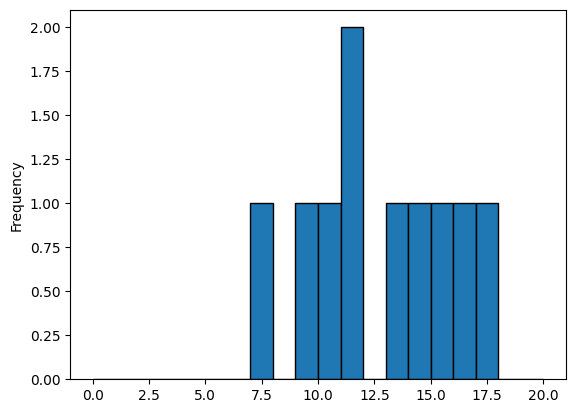

In [61]:
df['Note'].plot(kind='hist', bins=range(21), edgecolor='black');

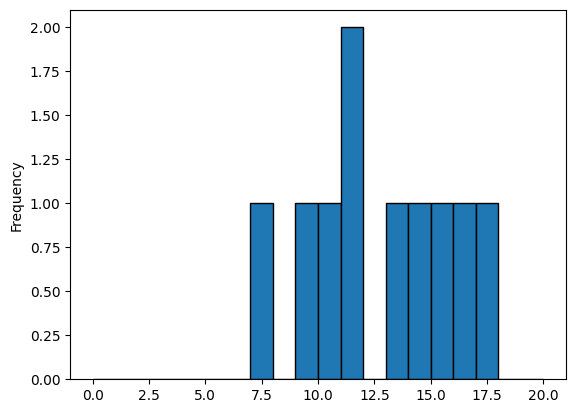

In [62]:
df['Note'].plot.hist(bins=range(21), edgecolor='black');